<b><font size='30'>Random Walk Practice</b>

In [1]:
# What is random walk?
# "In mathematics, a random walk is a random process that describes a path that consists of a succession of random steps on some mathematical space."

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<font size="5">Scenario : You are playing a game where you start on the ground floor (floor 0) of a building.</br>
The building has a total of 100 floors</br>
By rolling a dice, it will determine if you go up a floor or down a floor.</font>

<b>Dice Roll Possibilities:</b></br>
1 - Go down 1 floors </br>
2 - Go down 1 floor </br>
3 - Go up 1 floor </br>
4 - Go up 1 floor </br>
5 - Go up 1 floor </br>
6 - Roll again and go up that many floors


*Since we are heavily favored to move up floors with our rolls:</br>
We will also add an unlucky factor where after each roll there is a 1% chance you get caught by a guard and get escorted back to ground floor and start your journey again.


In [2]:
# using a seed for random, so results can be replicated
np.random.seed(1234)

# Stimulating 1 random walks``
random_walk=[0]
    
# 100 dice rolls
for x in range(100):
    floor=random_walk[-1] # taking the current floor as the starting point for each loop
    dice=np.random.randint(1,7)
        
    if dice<=2:
        floor=max(0,floor-1) # using max so you cant go below floor 0
    elif dice<=5:
        floor=min(100,floor+1) # using min so you cant go above floor 100
    else:
        floor=min(100,floor+np.random.randint(1,7)) # using min so you cant go above floor 100
    
    if np.random.rand()<=0.01:
            floor=0
        
    random_walk.append(floor)

In [3]:
# Lets see our results
print(random_walk)

[0, 1, 2, 1, 0, 1, 2, 3, 4, 3, 4, 5, 6, 7, 8, 9, 8, 9, 10, 11, 12, 17, 23, 25, 26, 25, 26, 27, 26, 27, 28, 29, 30, 31, 30, 31, 32, 31, 32, 31, 32, 31, 30, 29, 28, 29, 33, 34, 33, 34, 33, 32, 33, 34, 35, 34, 33, 34, 39, 40, 39, 43, 42, 41, 42, 41, 40, 41, 40, 42, 43, 42, 41, 40, 44, 45, 44, 45, 46, 45, 44, 45, 46, 45, 46, 45, 46, 47, 48, 47, 48, 47, 46, 45, 46, 45, 46, 51, 52, 51, 52]


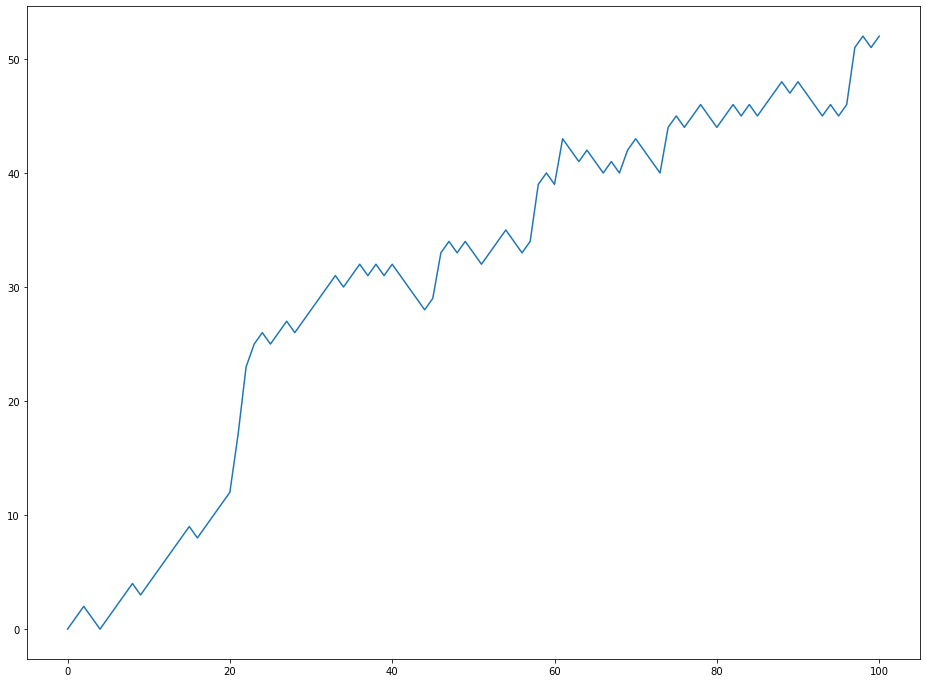

In [4]:
# To get a better visual, we will plot it on a graph
# Here we can see our journey throughout the floors, after 100 rolls we end up on the 52nd floor
plt.figure(figsize=(16, 12))
plt.plot(random_walk)
plt.show()

In [5]:
# Let's do 500 trials now for a larger sample size
all_walks=[]


for i in range(500):
    # Stimulating 500 random walks``
    random_walk=[0]
    
    # 100 dice rolls
    for x in range(100):
        floor=random_walk[-1] # taking the current floor as the starting point for each loop
        dice=np.random.randint(1,7)
        
        if dice<=2:
            floor=max(0,floor-1) # using max so you cant go below floor 0
        elif dice<=5:
            floor=min(100,floor+1)
        else:
            floor=min(100,floor+np.random.randint(1,7))
    
        if np.random.rand()<=0.01:
            floor=0
        
        random_walk.append(floor)
    all_walks.append(random_walk)

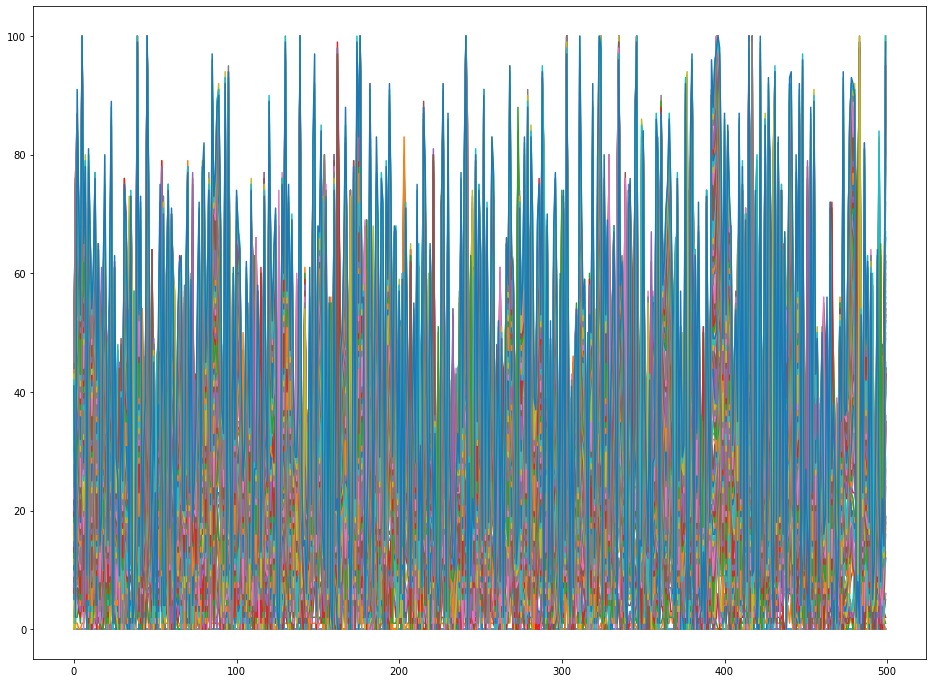

In [6]:
# After plotting the 500 trials, we noticed the chart doesn't look quite right
plt.figure(figsize=(16, 12))
plt.plot(all_walks)
plt.show()

In [7]:
# In order to properly display it on a graph, we have to transpose the array
all_walks_transpose=np.transpose(all_walks)

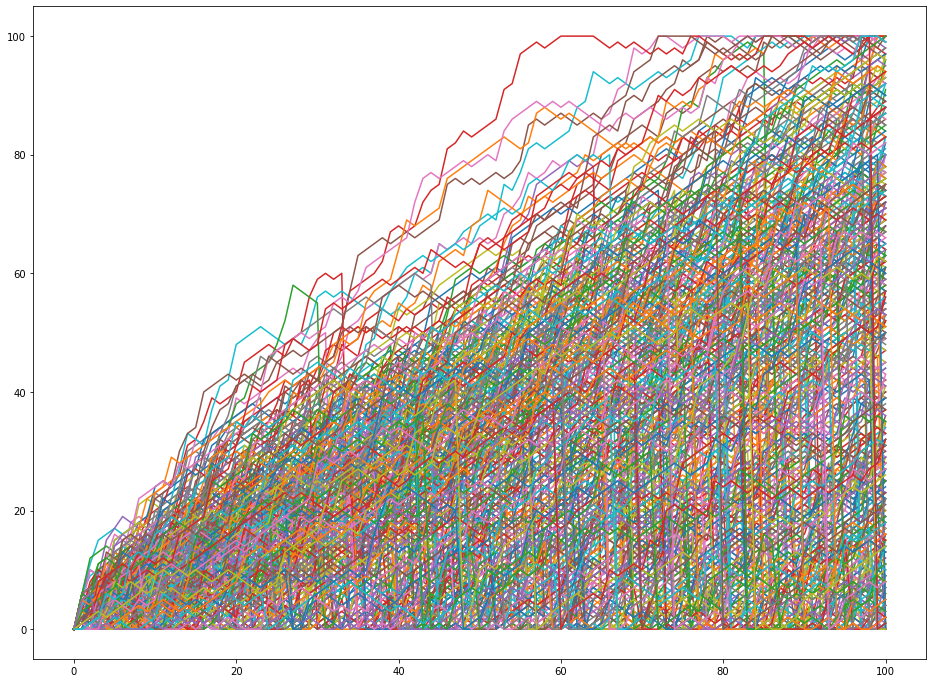

In [8]:
# There is a lot going on in the chart since we are visualing 500 trials
# The main purpose was to collect data with a larger sample size

plt.figure(figsize=(16, 12))
plt.plot(all_walks_transpose)
plt.show()

In [9]:
# So now that we collected data from a larger sample size, we can gain some insight to the odds of reaching a certain floor

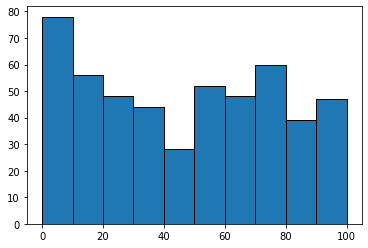

In [10]:

# We will take the last row from all_walks_transpose and plot it on a histogram
# The last row contains the final floor reached on all runs, we will store it in the variable called 'end1'
end1=all_walks_transpose[-1,:]

plt.hist(end1,edgecolor='black',bins=10)
plt.show()

In [11]:
# creating columns for dataframe
min_floor=[]
for i in range(11):
    floor_num=i*10
    min_floor.append(floor_num)

observations500=[]
for i in range(11):
    event=len(end1[end1>=i*10])
    observations500.append(event)

In [12]:
# What are the odds youll reach a certain floor as a minimum?

# Dataframe view
trials500=pd.DataFrame()
trials500['minimum_floor']=min_floor
trials500['num_of_observations']=observations500
trials500['% chance']=trials500['num_of_observations']/500*100
trials500

,minimum_floor,num_of_observations,% chance
0,0,500,100.0
1,10,422,84.4
2,20,366,73.2
3,30,318,63.6
4,40,274,54.8
5,50,246,49.2
6,60,194,38.8
7,70,146,29.2
8,80,86,17.2
9,90,47,9.4


In [13]:
# Let's do 10,000 trials now for an even larger sample size
all_walks=[]


for i in range(10000):
    # Stimulating 10,000 random walks
    random_walk=[0]
    
    # 100 dice rolls
    for x in range(100):
        floor=random_walk[-1]
        dice=np.random.randint(1,7)
        
        if dice<=2:
            floor=max(0,floor-1) 
        elif dice<=5:
            floor=min(100,floor+1)
        else:
            floor=min(100,floor+np.random.randint(1,7))
    
        if np.random.rand()<=0.01:
            floor=0
        
        random_walk.append(floor)
    all_walks.append(random_walk)

In [14]:
# In order to properly display it on a graph, we have to transpose the array
all_walks_transpose=np.transpose(all_walks)

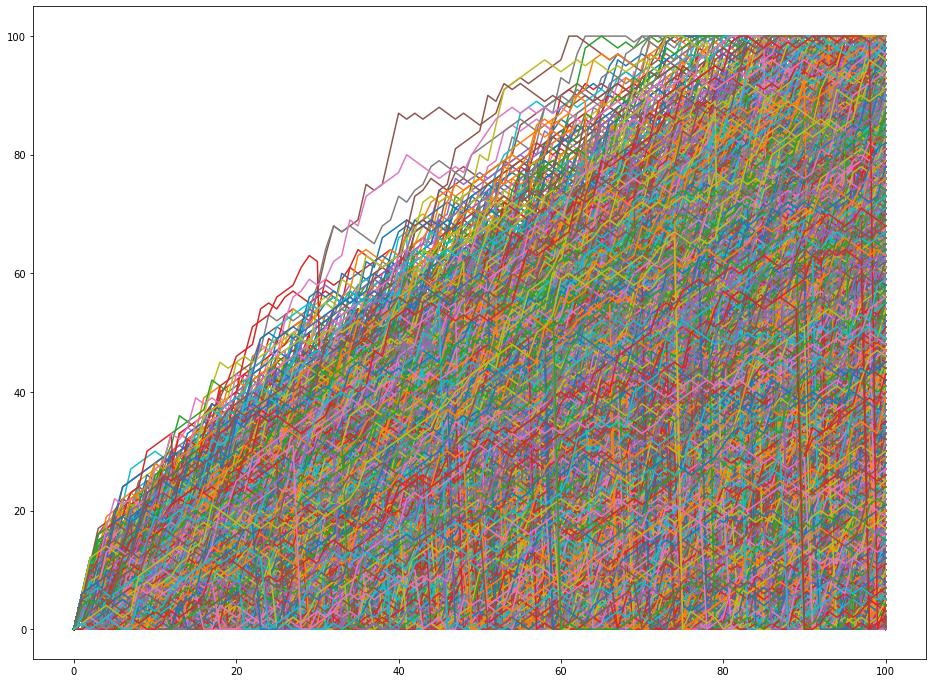

In [15]:
# Chart for 10,000 random walks, very busy visual
plt.figure(figsize=(16, 12))
plt.plot(all_walks_transpose)
plt.show()

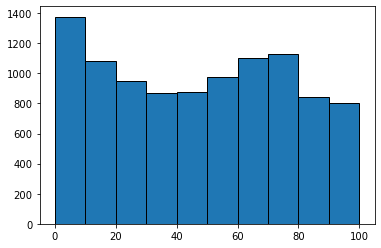

In [16]:
# We will take the last row from all_walks_transpose and plot it on a histogram
# The last row contains the final floor reached on all runs, we will store it in the variable called 'end2'
end2=all_walks_transpose[-1,:]

plt.hist(end2,edgecolor='black')
plt.show()

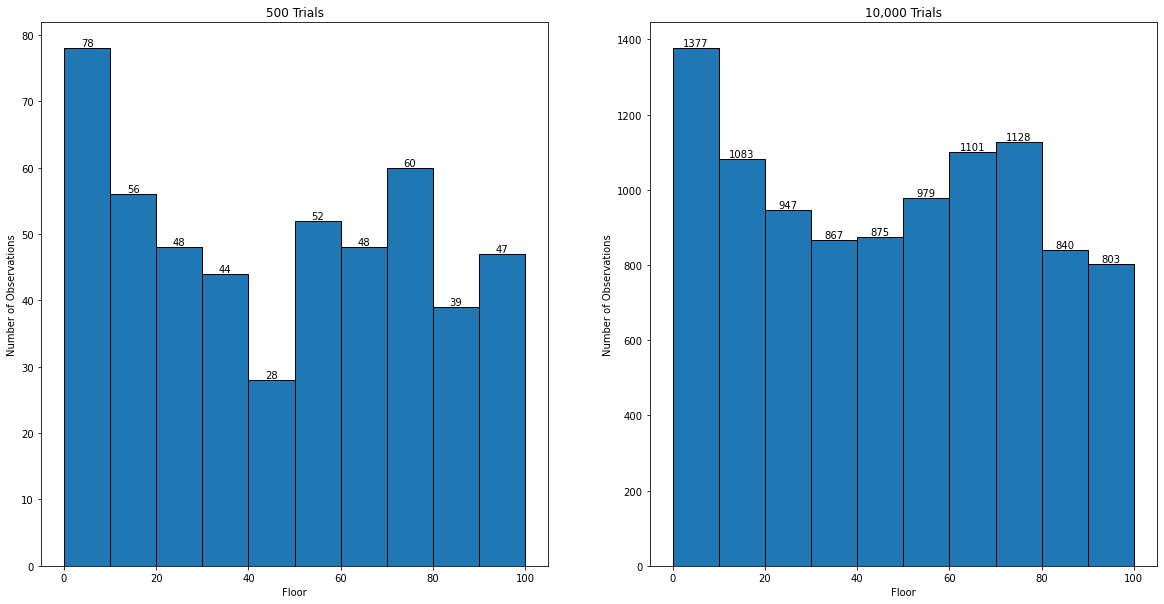

In [21]:
# Let's compare the histograms side by side
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
values,bins,bars=plt.hist(end1,edgecolor='black')
plt.bar_label(bars)
plt.title('500 Trials')
plt.xlabel('Floor')
plt.ylabel('Number of Observations')

plt.subplot(1,2,2)
values,bins,bars=plt.hist(end2,edgecolor='black')
plt.bar_label(bars)
plt.title('10,000 Trials')
plt.xlabel('Floor')
plt.ylabel('Number of Observations')

plt.show()

In [ ]:
We see that the shape of the distribution is similar and as we increase the number of trials it begins to smooth out

In [18]:
observations10k=[]
for i in range(11):
    event=len(end2[end2>=i*10])
    print(event)
    observations10k.append(event)
    

10000
8623
7540
6593
5726
4851
3872
2771
1643
803
217


In [19]:
# Dataframe view for 10k trials
trials10k=pd.DataFrame()
trials10k['minimum_floor']=min_floor
trials10k['num_of_observations']=observations10k
trials10k['% chance']=trials10k['num_of_observations']/10000*100 # /10000*100 can be shortened to just /100 but I kept it in here for the sake of clarity
trials10k

,minimum_floor,num_of_observations,% chance
0,0,10000,100.00
1,10,8623,86.23
2,20,7540,75.40
3,30,6593,65.93
4,40,5726,57.26
5,50,4851,48.51
6,60,3872,38.72
7,70,2771,27.71
8,80,1643,16.43
9,90,803,8.03


In [58]:
# comparing the tables side by side, the odds are very similar
from IPython.display import display_html 

df1_styler = trials500.style.set_table_attributes("style='display:inline'").set_caption('500 Trials')
df2_styler = trials10k.style.set_table_attributes("style='display:inline'").set_caption('10,000 Trials')
df2_t_styler = trials10k.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,minimum_floor,num_of_observations,% chance
0,0,500,100.000000
1,10,422,84.400000
2,20,366,73.200000
3,30,318,63.600000
4,40,274,54.800000
5,50,246,49.200000
6,60,194,38.800000
7,70,146,29.200000
8,80,86,17.200000
9,90,47,9.400000
